# Analyzing Economic Growth: Factors and Predictive Trends

## Project Overview

This project utilizes machine learning techniques to explore factors influencing economic growth across various countries. By examining indicators such as GDP, health and education expenditure, and trade policies, the aim is to classify countries by development levels, forecast economic trends, and identify patterns that could inform policy decisions.

## Exploratory Data Analysis (EDA)

The EDA phase involves preliminary examination of the data to understand its characteristics, including distribution, correlation, and trends over time among various economic indicators.

## Exploratory Data Analysis (EDA)

In [1]:
# Importing essential libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import geopandas as gpd
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
df = pd.read_csv('countries.csv')
df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19542982.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19688632.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,21000256.0,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,...,22645130.0,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,...,23553551.0,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491


In [2]:
# Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   5106 non-null   object 
 1   Country Code                   5106 non-null   object 
 2   Year                           5106 non-null   int64  
 3   Agriculture (% GDP)            4830 non-null   float64
 4   Ease of Doing Business         4508 non-null   float64
 5   Education Expenditure (% GDP)  4738 non-null   float64
 6   Export (% GDP)                 4646 non-null   float64
 7   GDP                            5037 non-null   float64
 8   Health Expenditure (% GDP)     4531 non-null   float64
 9   Import (% GDP)                 4646 non-null   float64
 10  Industry (% GDP)               4853 non-null   float64
 11  Inflation Rate                 4554 non-null   float64
 12  R&D                            3588 non-null   f

In [3]:
# Descriptive statistics for numerical features
df.describe()

,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),Inflation Rate,...,Unemployment,Population,Land,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
count,5106.000000,4830.000000,4508.000000,4738.000000,4646.000000,5.037000e+03,4531.000000,4646.000000,4853.000000,4554.000000,...,4439.000000,5.106000e+03,5.106000e+03,4.646000e+03,4.646000e+03,4.692000e+03,4.531000e+03,4.646000e+03,5037.000000,5106.000000
mean,2011.000000,10.893914,61.738665,14.458547,44.018003,3.120245e+11,6.167133,49.445204,26.315490,6.991400,...,8.115195,3.282803e+07,7.003599e+05,9.505712e+10,9.248778e+10,4.304518e+10,3.214250e+10,2.569338e+09,15336.273219,336.020957
std,6.633899,10.971965,13.775267,4.984259,33.173984,1.405946e+12,2.744570,30.474001,12.924200,19.858123,...,5.888784,1.281141e+08,2.117451e+06,2.638186e+11,2.720004e+11,1.946240e+11,2.012357e+11,5.380235e+10,23831.258493,1570.547928
min,2000.000000,0.012519,19.977700,0.833360,1.571162,1.396473e+07,1.263576,1.127672,2.758632,-16.859691,...,0.095000,9.609000e+03,2.027000e+00,7.959988e+06,2.290063e+07,4.129775e+06,2.093155e+06,-9.540869e+11,110.460875,0.136492
25%,2005.000000,2.275972,52.919894,10.870940,23.544736,4.186073e+09,4.158750,29.401814,17.919508,1.599237,...,3.866000,8.049668e+05,1.130000e+04,1.827572e+09,2.510900e+09,6.457364e+08,2.687793e+08,-2.043559e+09,1564.015195,30.837607
50%,2011.000000,6.979923,61.982110,13.952830,36.438987,1.777477e+10,5.639608,42.543697,24.119251,3.466447,...,6.510000,5.897816e+06,9.895395e+04,8.541387e+09,9.727140e+09,3.064088e+09,1.286994e+09,-2.340244e+08,5396.214227,82.396143
75%,2017.000000,16.748657,72.535918,17.609406,54.543771,1.216041e+11,7.865923,60.600202,31.812769,7.288914,...,10.840000,2.123560e+07,4.881000e+05,6.026577e+10,5.282874e+10,1.958102e+10,7.609297e+09,1.859483e+09,19733.229269,195.721744
max,2022.000000,79.042362,87.166330,44.801800,433.836004,2.546270e+13,24.230680,429.359095,86.669555,557.201817,...,37.320000,1.417173e+09,1.709825e+07,3.714245e+12,3.874205e+12,3.667693e+12,3.966028e+12,5.766511e+11,234317.084818,23814.890701


## Data Cleaning and Preprocessing

Here, we clean the data by handling missing values and unnecessary columns, and prepare it for further analysis.


In [4]:
# Dropping unnecessary column 'Country Code' from the DataFrame.
df = df.drop(['Country Code','Population Density'], axis=1)


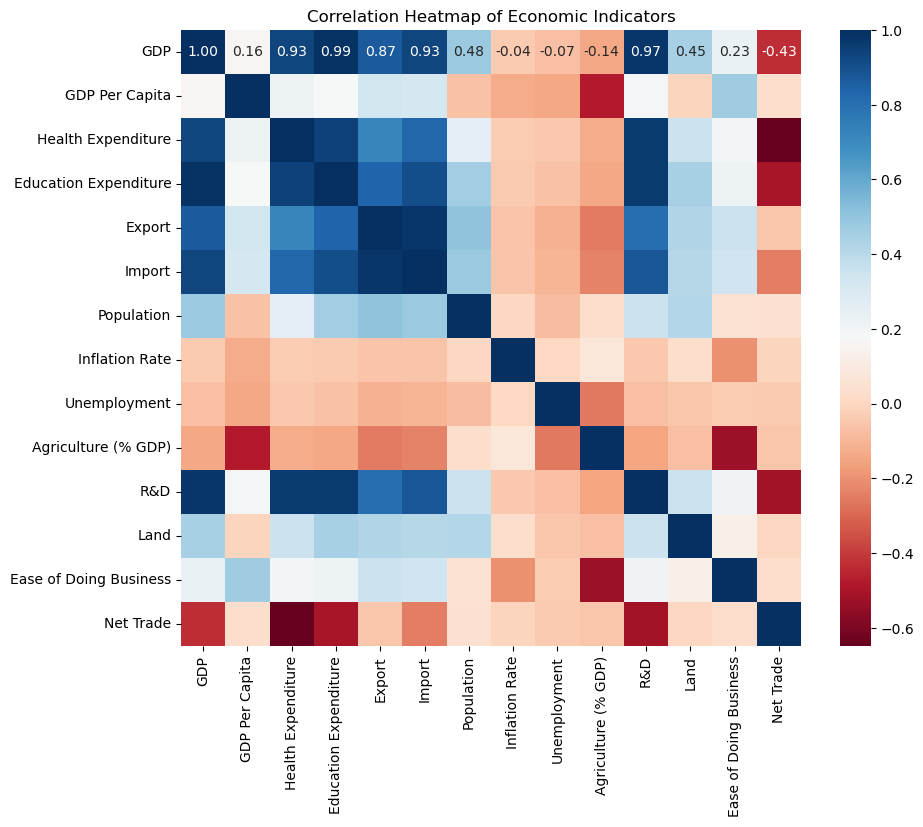

In [5]:
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['GDP', 'GDP Per Capita', 'Health Expenditure', 
                         'Education Expenditure', 'Export', 
                         'Import', 'Population','Inflation Rate','Unemployment',
                         'Agriculture (% GDP)','R&D','Land','Ease of Doing Business','Net Trade']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu')
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()


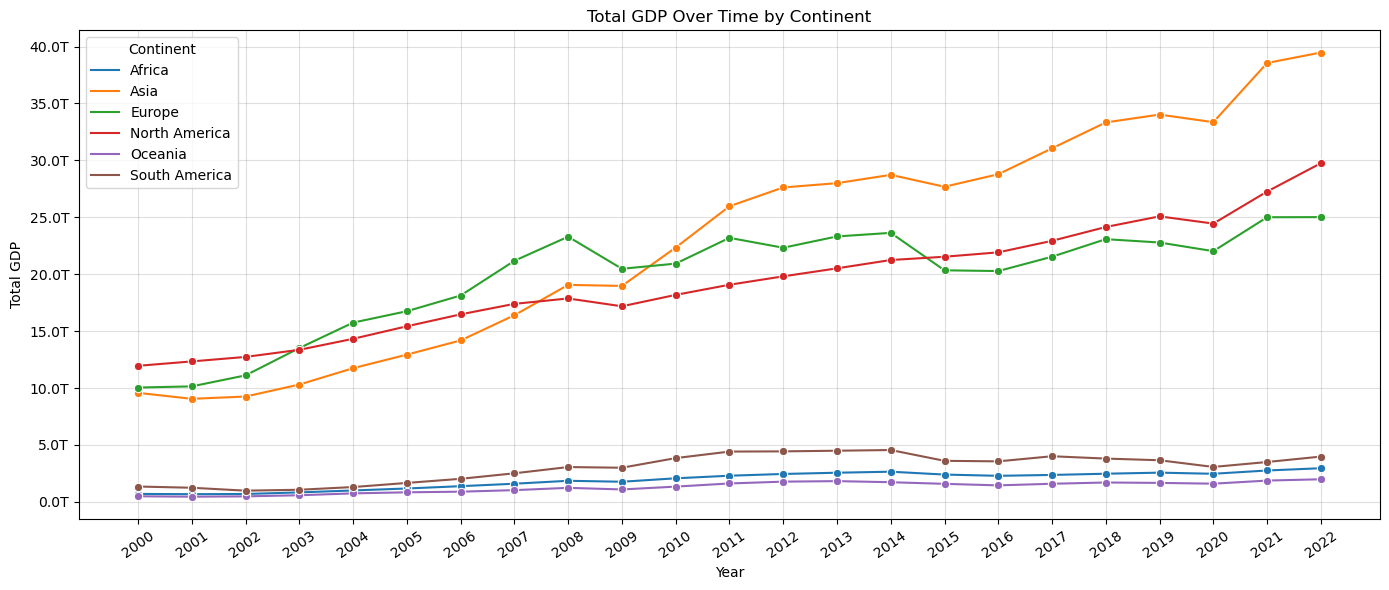

In [6]:
# Visualizing the total GDP over time for each continent using a line plot.
gdp_per_continent_over_time = df.groupby(['Year', 'Continent Name'])['GDP'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=gdp_per_continent_over_time, x='Year', y='GDP', hue='Continent Name', marker='o', palette='tab10')

plt.title('Total GDP Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Total GDP')

plt.xticks(gdp_per_continent_over_time['Year'].unique(), rotation=35)
plt.legend(title='Continent')
plt.grid(True, c='gray', alpha=0.25)
# Formatting y-axis labels to display GDP values in trillions
plt.gca().set_yticklabels(['{:.1f}T'.format(y * 1e-12) for y in plt.gca().get_yticks()])
plt.tight_layout()

# Displaying the plot
plt.show()


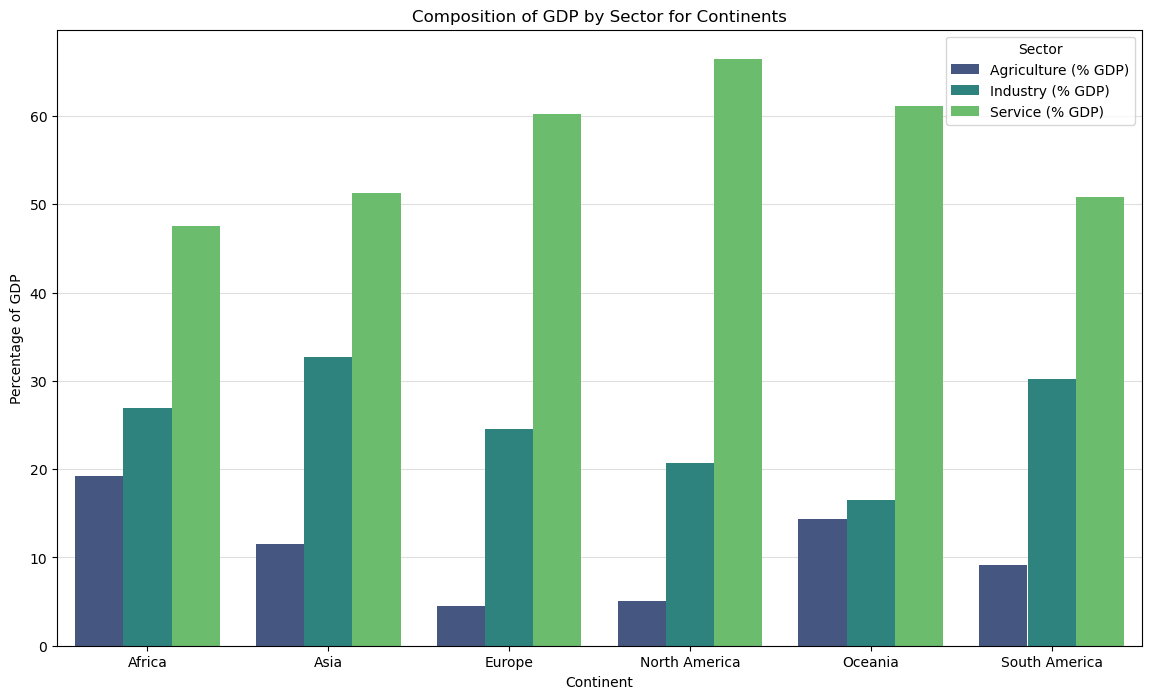

In [7]:
# Visualizing the composition of GDP by sector for different continents using a grouped bar plot.
sector_comparison_continent = df.groupby('Continent Name')[['Agriculture (% GDP)', 'Industry (% GDP)', 'Service (% GDP)']].mean()

# Reshaping the DataFrame for plotting
sector_comparison_continent = sector_comparison_continent.stack().reset_index()
sector_comparison_continent.columns = ['Continent Name', 'Sector', 'Percentage']

# Creating the grouped bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=sector_comparison_continent, x='Continent Name', y='Percentage', hue='Sector', palette='viridis')
plt.title('Composition of GDP by Sector for Continents')
plt.ylabel('Percentage of GDP')
plt.xlabel('Continent')
plt.legend(title='Sector')
plt.grid(axis='y', c='gray', alpha=0.25)
plt.gca().set_axisbelow(True)
plt.show()


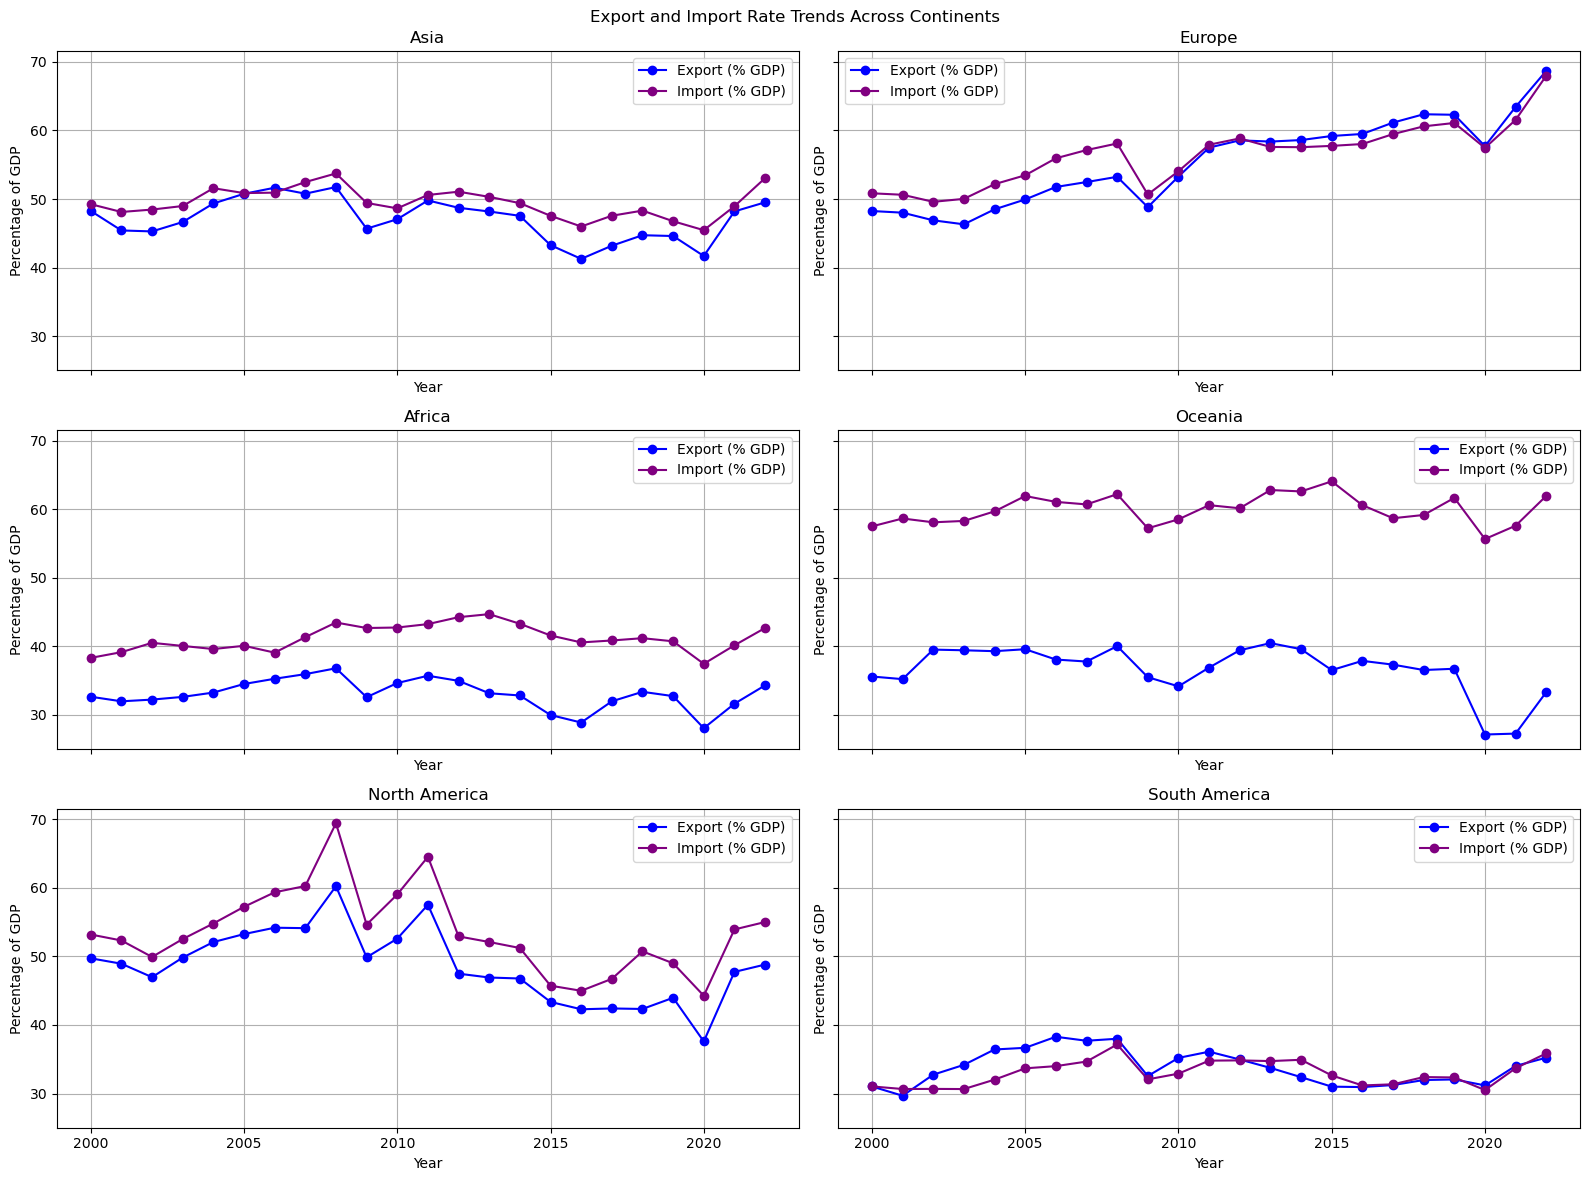

In [8]:
# Visualizing the export and import rate across different continents over time
continents = df['Continent Name'].unique()

n_rows = (len(continents) + 1) // 2
fig, axs = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows), sharex=True, sharey=True)

for i, continent in enumerate(continents):
    row = i // 2
    col = i % 2
    
    # Filter data for the continent
    df_continent = df[df['Continent Name'] == continent]
    
    # Aggregate data for plotting
    years = df_continent['Year'].unique()
    export = df_continent.groupby('Year')['Export (% GDP)'].mean()
    import_ = df_continent.groupby('Year')['Import (% GDP)'].mean()
    
    # Plotting
    ax = axs[row, col]
    ax.plot(years, export, label='Export (% GDP)', color='blue', marker='o')
    ax.plot(years, import_, label='Import (% GDP)', color='purple', marker='o')
    
    ax.set_title(continent)
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of GDP')
    ax.legend()
    ax.grid(True)

fig.suptitle('Export and Import Rate Trends Across Continents')
plt.tight_layout()
plt.show()


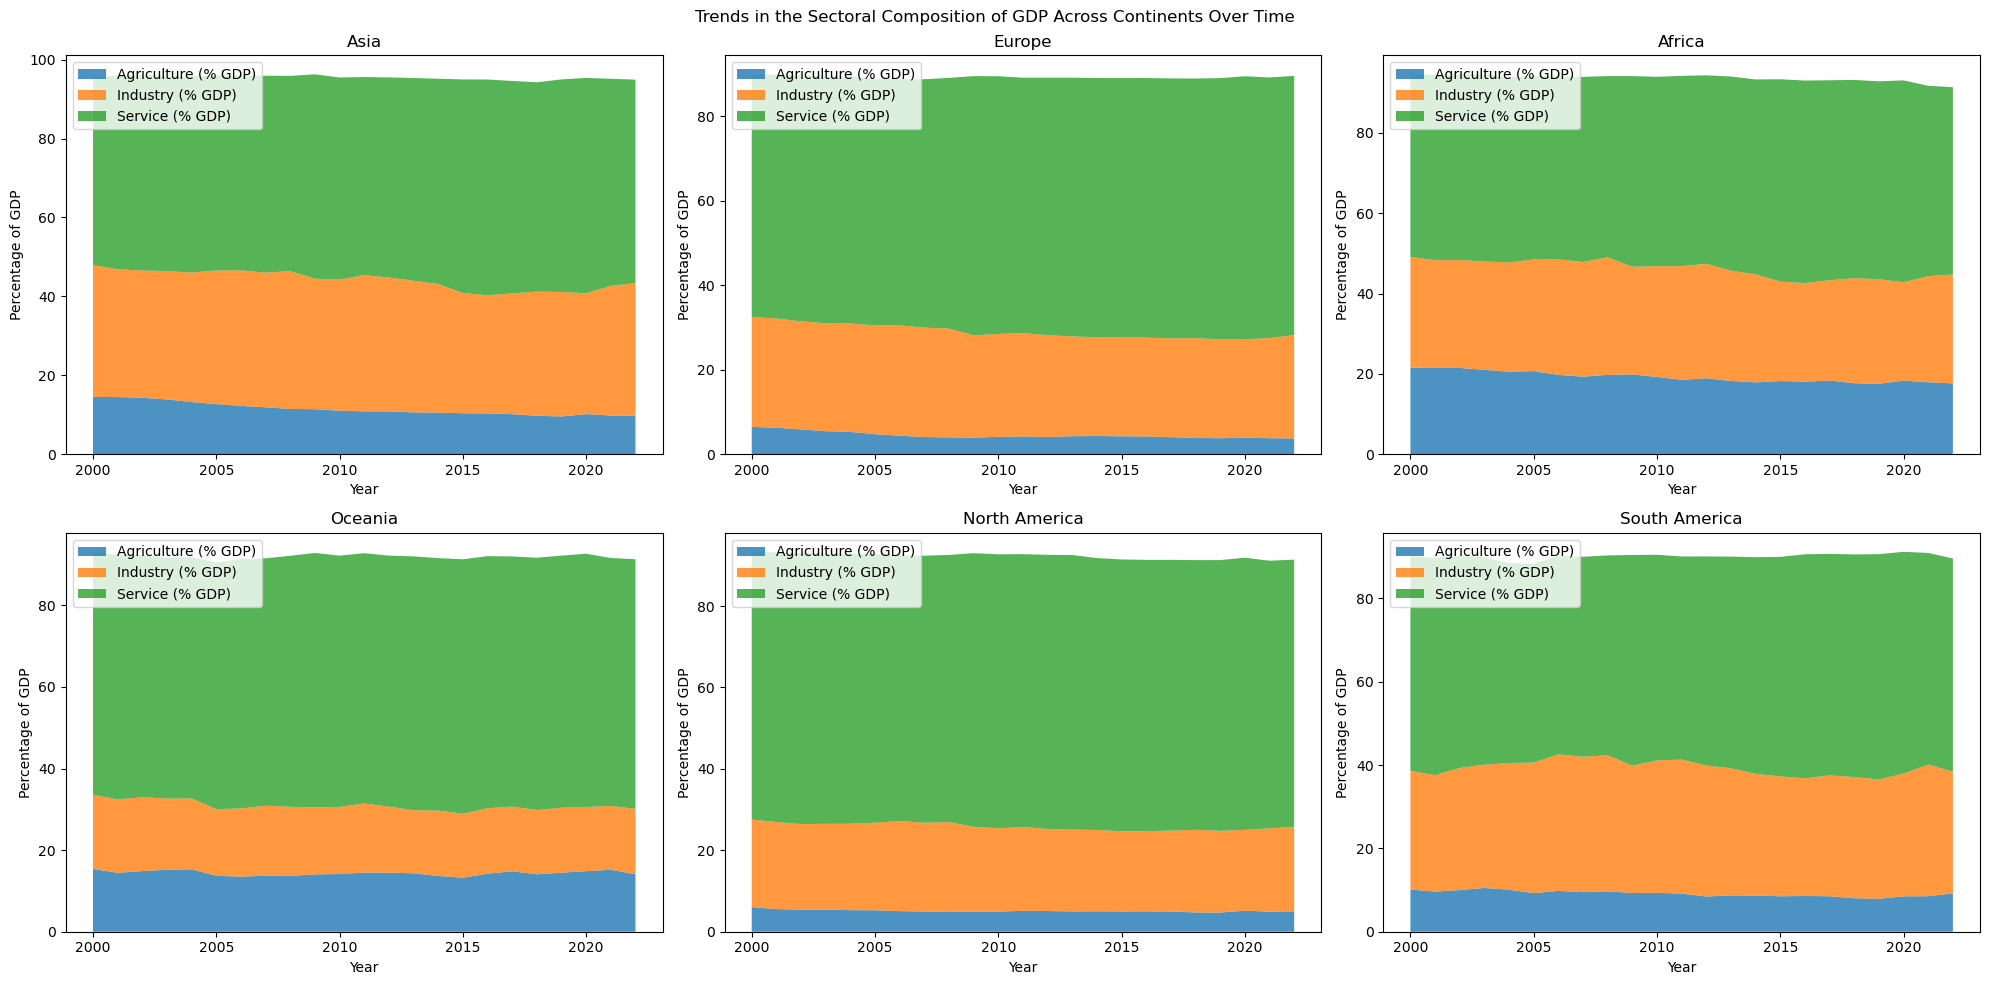

In [9]:
#Visualizing the composition of GDP by sector for different continents over time using a stacked area chart.
continents = df['Continent Name'].unique()
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each continent and plot
for i, continent in enumerate(continents):
    row = i // 3
    col = i % 3
    
    # Filter data for the continent
    df_continent = df[df['Continent Name'] == continent]
    
    # Aggregate data
    sector_time = df_continent.groupby(['Year'])[['Agriculture (% GDP)', 'Industry (% GDP)', 'Service (% GDP)']].mean()
    ax = axs[row, col]
    
    # Plotting on a subplot
    ax.stackplot(sector_time.index, sector_time['Agriculture (% GDP)'], sector_time['Industry (% GDP)'], sector_time['Service (% GDP)'], 
                 labels=['Agriculture (% GDP)', 'Industry (% GDP)', 'Service (% GDP)'], alpha=0.8)
    ax.set_title(continent)
    ax.legend(loc='upper left')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of GDP')

fig.suptitle('Trends in the Sectoral Composition of GDP Across Continents Over Time')
plt.tight_layout()
plt.show()


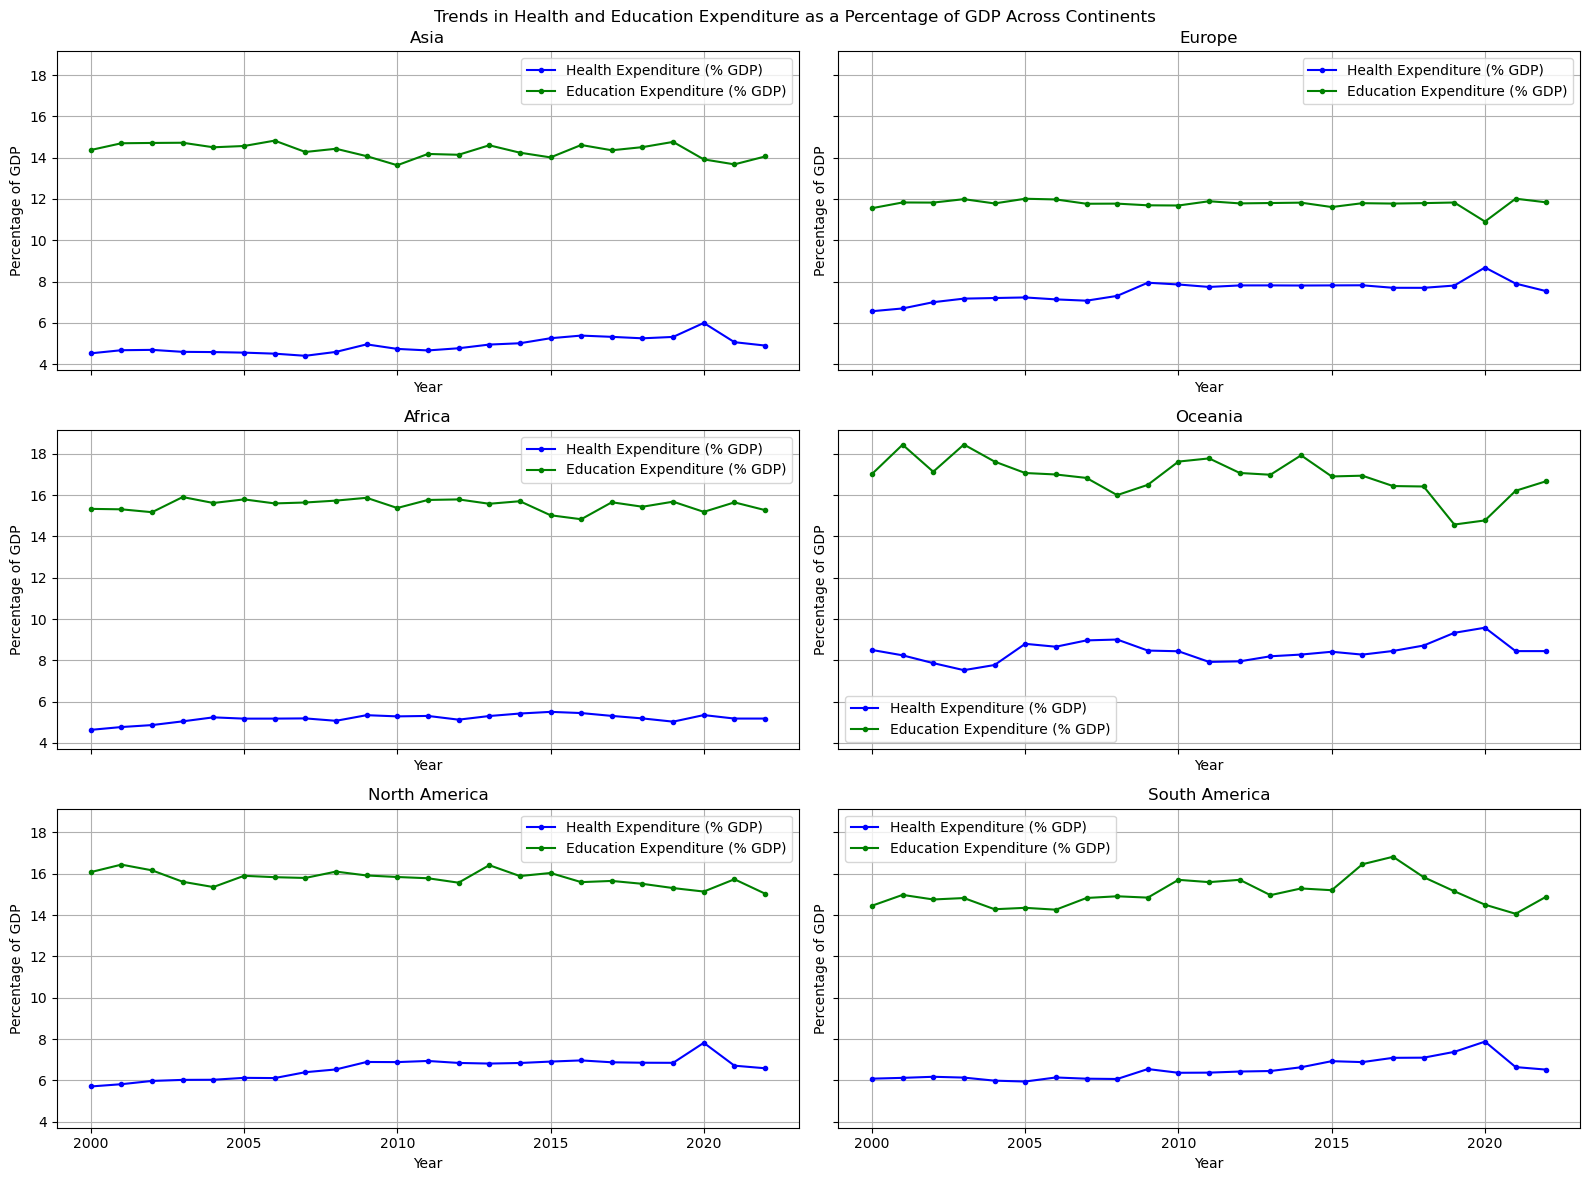

In [10]:
# Visualizing the composition of GDP by Health and Education Expenditure across different continents over time
continents = df['Continent Name'].unique()

n_rows = (len(continents) + 1) // 2
fig, axs = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows), sharex=True, sharey=True)

for i, continent in enumerate(continents):
    row = i // 2
    col = i % 2
    
    # Filter data for the continent
    df_continent = df[df['Continent Name'] == continent]
    
    # Aggregate data for plotting
    years = df_continent['Year'].unique()
    health_exp_pct_gdp = df_continent.groupby('Year')['Health Expenditure (% GDP)'].mean()
    education_exp_pct_gdp = df_continent.groupby('Year')['Education Expenditure (% GDP)'].mean()
    
    # Plotting
    ax = axs[row, col]
    ax.plot(years, health_exp_pct_gdp, label='Health Expenditure (% GDP)', color='blue', marker='.')
    ax.plot(years, education_exp_pct_gdp, label='Education Expenditure (% GDP)', color='green', marker='.')
    
    ax.set_title(continent)
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of GDP')
    ax.legend()
    ax.grid(True)

fig.suptitle('Trends in Health and Education Expenditure as a Percentage of GDP Across Continents')
plt.tight_layout()
plt.show()


# Preparing for Model Building

With the foundational understanding established during the EDA, our next step involves preparing the dataset for machine learning models. This preparation will enable us to quantitatively assess the impact of various factors on economic growth and potentially forecast future trends. The focus will be on developing a multivariate linear regression model, leveraging the core economic indicators identified as significant during the EDA:

- Health Expenditure (% GDP)
- Education Expenditure (% GDP)
- Export (% GDP)
- Import (% GDP)
- Population
- R&D
- Land
- Net Trade

In [11]:
# Selecting features for the regression model based on EDA findings
features = ['R&D', 'Land', 'Population', 'Export', 'Import', 'Education Expenditure', 'Health Expenditure', 'Net Trade']
target = 'GDP'

# Separating the features and target variable
X = df[features]
Y = df[[target]]

# Filling missing values with the median of each column
X.fillna(X.median(), inplace=True)
Y.fillna(Y.median(), inplace=True)

In [12]:
# Applying polynomial feature transformation to introduce non-linearity
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.25, random_state=42)

# Standardizing the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Training and Evaluation

Training a linear regression model and a ridge regression model to compare performance.

In [13]:
# Define the model
linear_model = LinearRegression()

# Perform 5-fold cross-validation for RMSE
mse_cv_scores = cross_val_score(linear_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Convert MSE to RMSE, take the square root of the absolute values of MSE scores
rmse_cv_scores = np.sqrt(-mse_cv_scores)

# Calculate the average RMSE across all 5 folds
cv_rmse = np.mean(rmse_cv_scores)
cv_rmse_std = np.std(rmse_cv_scores)

print(f'Average RMSE from 5-fold cross-validation: {cv_rmse:.5f}')

Average RMSE from 5-fold cross-validation: 86459289326.77733


In [14]:
# Train the model on the full training dataset
linear_model.fit(X_train, Y_train)

# Predict GDP for the test set
Y_pred_linear = linear_model.predict(X_test)

# Calculate RMSE for the predictions
rmse_linear = np.sqrt(mean_squared_error(Y_test, Y_pred_linear))

# Calculate R² for the predictions
r2_test = r2_score(Y_test, Y_pred_linear)

print(f'Test RMSE: {rmse_linear:.5f}')
print(f'Test R²: {r2_test:.5f}')


Test RMSE: 56770177062.45026
Test R²: 0.99743


In [15]:
# Training a ridge regression model using GridSearchCV to find the optimal alpha
param_grid = {'alpha': np.logspace(-6, 6, 13)}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=10)
ridge_cv.fit(X_train, Y_train)

# Best model
best_ridge = ridge_cv.best_estimator_

# Predicting and evaluating the ridge model
Y_pred_ridge = best_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(Y_test, Y_pred_ridge))
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print(f'Ridge Regression RMSE: {rmse_ridge:.5f}')
print(f'Ridge Regression R²: {r2_ridge:.5f}')
print(f"Optimal Ridge alpha: {ridge_cv.best_params_['alpha']}")


Ridge Regression RMSE: 56788188080.05147
Ridge Regression R²: 0.99742
Optimal Ridge alpha: 1e-06


## Visualizing Model Performance

Plotting actual vs. predicted GDP values to visualize the model's effectiveness.


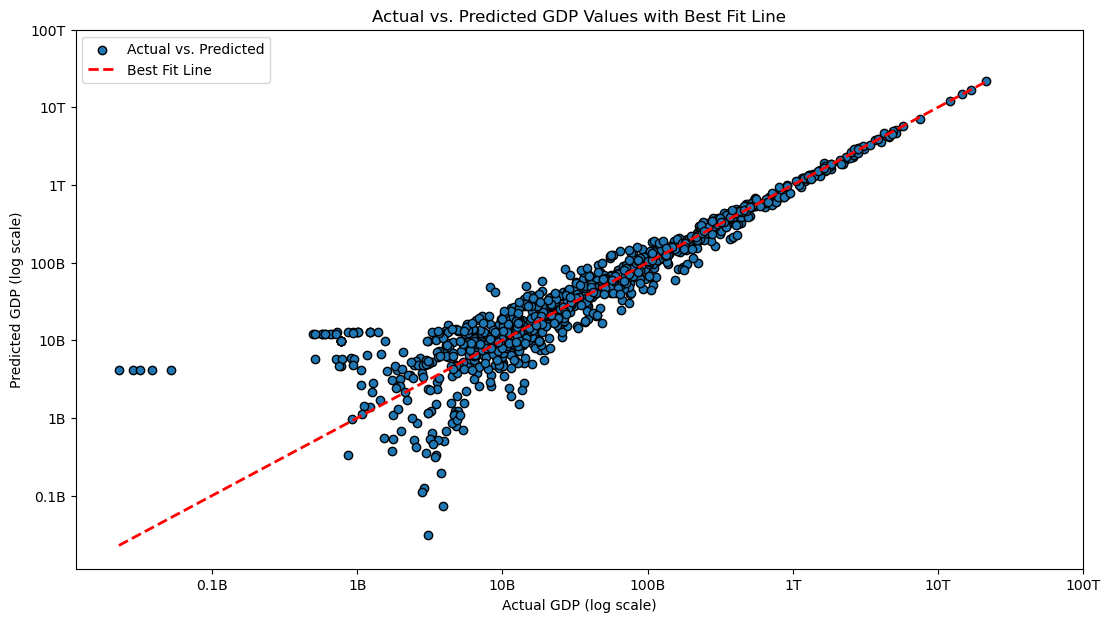

In [17]:
# Plot the observed values against the predicted values
plt.figure(figsize=(13, 7))
plt.scatter(Y_test, Y_pred_linear, edgecolor='k', label='Actual vs. Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Best Fit Line')

# Add labels and titleß
plt.xlabel('Actual GDP (log scale)')
plt.ylabel('Predicted GDP (log scale)')
plt.title('Actual vs. Predicted GDP Values with Best Fit Line')
plt.legend()

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Set custom tick marks and labels for x-axis
plt.xticks([1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14], ['0.1B', '1B', '10B', '100B', '1T', '10T','100T'])
# Set custom tick marks and labels for y-axis
plt.yticks([1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14], ['0.1B','1B', '10B', '100B', '1T', '10T', '100T'])

# Set minor ticks
plt.minorticks_off()

# Show plot
plt.show()

In [18]:
# Mean GDP value
mean_gdp = df['GDP'].mean()

# Calculate RMSE as a percentage of the mean GDP
rmse_percentage = (rmse_linear / mean_gdp) * 100

# Print the RMSE percentage
print(f"RMSE as a percentage of the mean GDP: {rmse_percentage:.2f}%")
print(f"RMSE: {rmse_linear}")
print(f"Stardard deviation of GDP mean: {np.std(df['GDP'])}")


RMSE as a percentage of the mean GDP: 18.19%
RMSE: 56770177062.45026
Stardard deviation of GDP mean: 1405806885993.533


Overall, while the RMSE percentage may appear relatively high, considering the scale of the GDP values and the standard deviation provides a more comprehensive assessment of the model's performance. It indicates that the model's predictions are reasonably accurate relative to the variability in the GDP data.

## Interpretation of Regression Coefficients

The regression analysis has provided us with several coefficients, each representing the impact of single terms and interaction terms of features on the predicted GDP. Below is a detailed interpretation and significance of these coefficients:


In [19]:
if 'PolynomialFeatures' in str(type(poly)):
    feature_names = poly.get_feature_names_out(input_features=X.columns)
else:
    feature_names = X_train.columns

# Coefficients from the Ridge model
coef = linear_model.coef_.flatten()

# Creating the DataFrame
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})

# Showing the DataFrame
coefficients_df.head(10)

,Feature,Coefficient
0,1,6.346233e+03
1,R&D,1.901050e+11
2,Land,8.009303e+09
3,Population,9.100511e+10
4,Export,-2.193946e+12
5,Import,2.316034e+12
6,Education Expenditure,6.431406e+11
7,Health Expenditure,1.010517e+12
8,Net Trade,4.321713e+11
9,R&D^2,5.210772e+11


In [20]:
# Coefficients and Feature Names
coefficients = [value for value in linear_model.coef_[0]]
features = poly.get_feature_names_out()

# Creating a DataFrame for ease of analysis
coeff_df = pd.DataFrame(data={'Feature': features, 'Coefficient': coefficients})
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

# Display the DataFrame for a quick overview
display(coeff_df.head(10))


,Feature,Coefficient,Absolute Coefficient
13,R&D Import,-6.013018e+15,6.013018e+15
12,R&D Export,4.985166e+15,4.985166e+15
16,R&D Net Trade,-1.314962e+15,1.314962e+15
36,Import Education Expenditure,-8.599685e+14,8.599685e+14
32,Export Education Expenditure,7.278328e+14,7.278328e+14
37,Import Health Expenditure,-4.043348e+14,4.043348e+14
33,Export Health Expenditure,3.206599e+14,3.206599e+14
41,Education Expenditure Net Trade,-1.885772e+14,1.885772e+14
43,Health Expenditure Net Trade,-9.084373e+13,9.084373e+13
25,Population Export,7.495445e+13,7.495445e+13


To better visualize the impact of each feature, let's plot the coefficients of the features. This will help us understand which features have the most substantial influence on GDP, either positive or negative.


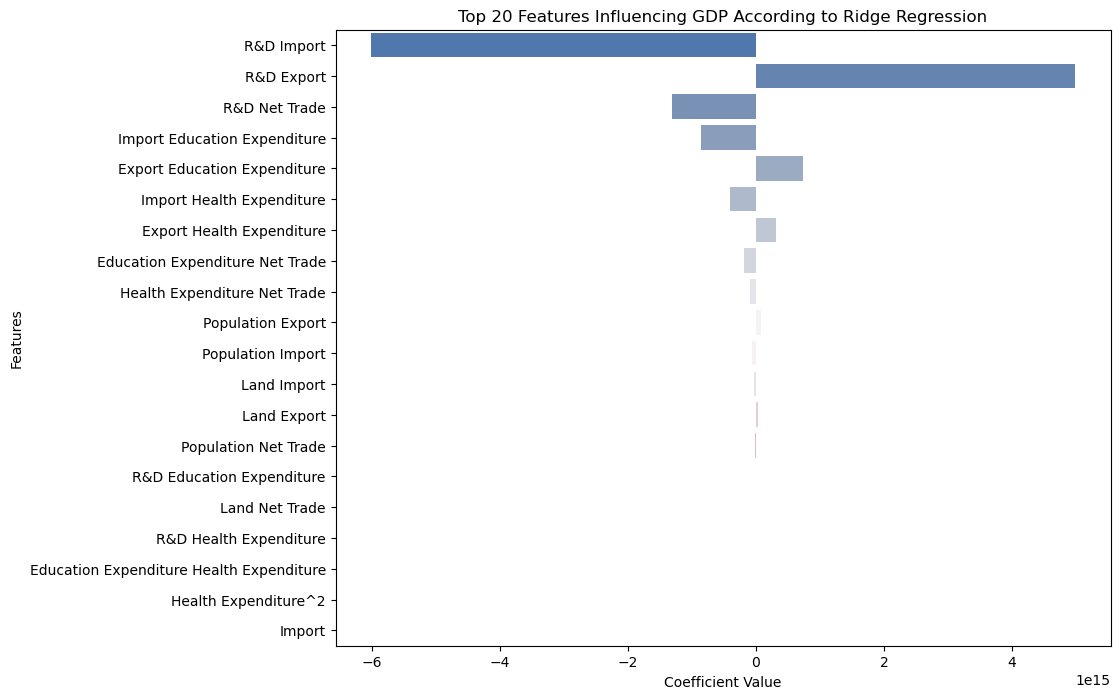

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(data=coeff_df.head(20), x='Coefficient', y='Feature', palette="vlag")
plt.title('Top 20 Features Influencing GDP According to Ridge Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


### Key Observations:

- **R&D and GDP**: There is a very strong positive correlation with R&D investments, indicating that higher spending in research and development is likely to significantly boost GDP. This aligns well with the economic theory that innovation drives economic growth.

- **Trade Balance (Net Trade)**: The interaction terms involving Net Trade (exports minus imports) show that a positive trade balance is beneficial for the GDP, which is a typical result for economies relying heavily on exports.

- **Complex Interactions**:
  - The positive coefficient for `R&D*Import` suggests that countries importing more R&D-intensive goods or services likely see a significant GDP increase, possibly due to technology spillovers.
  - Conversely, the negative coefficient for `R&D*Export` indicates a complex dynamic where exporting a lot of R&D-intensive goods might not always correlate with GDP growth, potentially due to domestic value addition being exported.

### Implications for Economic Policy:

1. **Invest in R&D**: Strengthening research and development can have profound effects on GDP. Policies aimed at boosting domestic R&D, as well as importing R&D-intensive goods, should be considered.

2. **Focus on Trade Dynamics**: Understanding the balance between imports and exports, especially in relation to R&D and technological goods, can help frame better trade policies that capitalize on global value chains for maximum economic benefit.

3. **Monitor and Foster Key Industries**: Industries that contribute to the `Education Expenditure` and `Health Expenditure` seem to also play significant roles.


## Clustering Analysis: Identifying Economic Groups

This section applies K-Means clustering to categorize countries based on various economic indicators, aiming to identify patterns and groupings that may not be immediately apparent from direct analysis.

### K-Means Clustering

K-Means clustering is used here to partition countries into groups (clusters) that exhibit similar economic characteristics. This unsupervised learning technique will help us uncover intrinsic groupings within the data.


In [22]:
# Load data
df = pd.read_csv('countries.csv')

# Selecting the most recent year's data (2022)
df_recent = df[df['Year'] == 2022]

# Define features for clustering
features = ['GDP', 'Inflation Rate', 'Health Expenditure', 'Education Expenditure', 'Export', 'Import', 'Population', 'GDP Per Capita']

# Impute missing values using the mean
imputer = SimpleImputer(strategy='median')
df_recent[features] = imputer.fit_transform(df_recent[features])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_recent[features])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

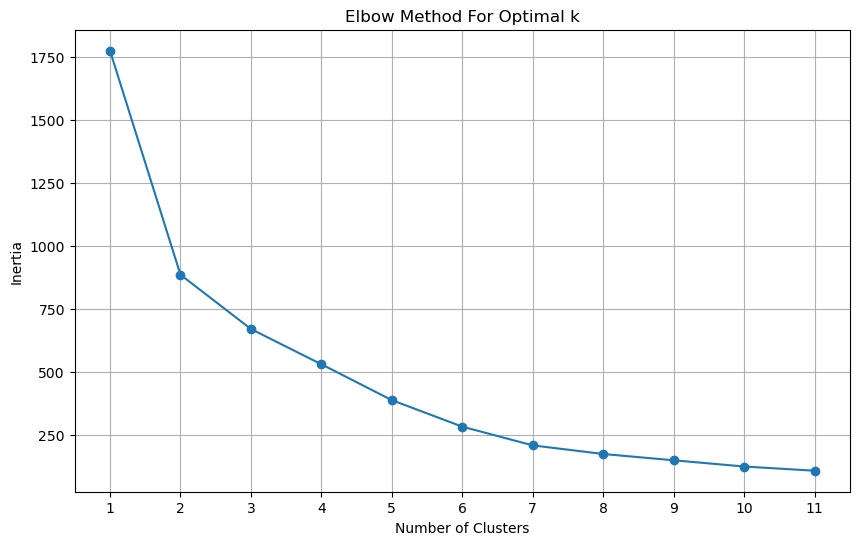

In [23]:
# Finding the optimal number of clusters using the Elbow method
inertia = []
range_values = range(1, 12)
for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_values)
plt.grid(True)
plt.show()


Despite the Elbow Method suggesting two clusters, the decision to adopt three clusters is further justified by the observed inflection point at k=3 in the plot, which aligns with the distinct economic stages of developing, emerging, and developed economies for a more nuanced analysis.

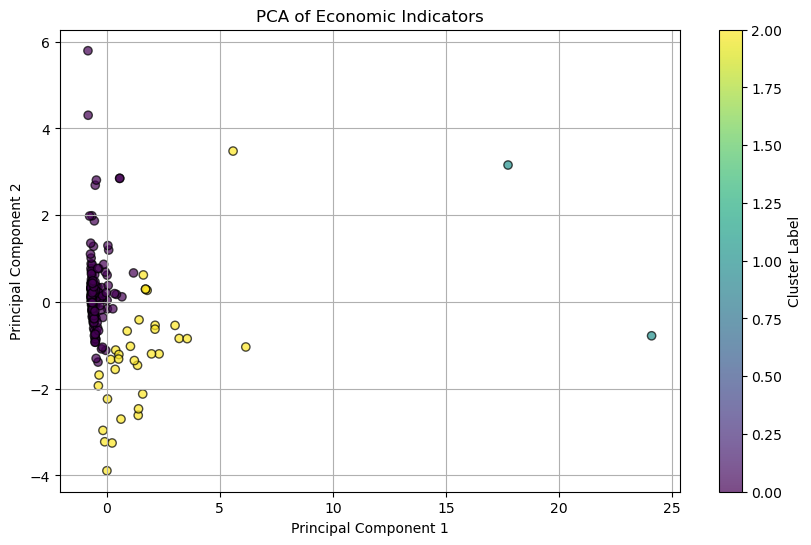

In [24]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
df_recent['Cluster'] = kmeans.labels_

# Plotting the PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_recent['Cluster'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA of Economic Indicators')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Adding a color bar
plt.colorbar(scatter, label='Cluster Label')

plt.show()

### Analyzing Cluster Characteristics

We now examine the centroids of each cluster to understand the defining characteristics of each group.

In [25]:
# Displaying the size of each cluster
cluster_counts = df_recent['Cluster'].value_counts()
print(cluster_counts)

# Calculate and plot the cluster characteristics
cluster_stats = df_recent.groupby('Cluster')[features].agg(['mean', 'median', 'std', 'min', 'max'])
cluster_summary_mean = df_recent.groupby('Cluster')[features].mean()

Cluster
0    186
2     34
1      2
Name: count, dtype: int64


In [26]:
cluster_stats.T

Cluster                                  0             1             2
GDP                   mean    9.299316e+10  2.171294e+13  1.250559e+12
                      median  2.160361e+10  2.171294e+13  6.968226e+11
                      std     1.778489e+11  5.302968e+12  1.197235e+12
                      min     6.034939e+07  1.796317e+13  4.816765e+09
                      max     1.319100e+12  2.546270e+13  4.231141e+12
Inflation Rate        mean    1.195608e+01  4.988188e+00  6.631353e+00
                      median  7.909163e+00  4.988188e+00  7.284571e+00
                      std     1.647007e+01  4.263305e+00  2.464839e+00
                      min    -6.687321e+00  1.973576e+00  4.646185e-01
                      max     1.388085e+02  8.002800e+00  1.000121e+01
Health Expenditure    mean    5.018307e+09  2.392023e+12  9.971513e+10
                      median  2.097543e+09  2.392023e+12  5.643055e+10
                      std     8.811875e+09  2.225979e+12  1.122998e+11
                      min     8.885816e+06  8.180183e+11  1.079410e+08
                      max     5.592622e+10  3.966028e+12  4.439491e+11
Education Expenditure mean    1.337907e+10  2.911157e+12  1.524229e+11
                      median  4.466047e+09  2.911157e+12  1.043217e+11
                      std     2.543623e+10  1.069903e+12  1.346147e+11
                      min     1.054115e+07  2.154622e+12  3.646118e+08
                      max     2.210669e+11  3.667693e+12  4.760285e+11
Export                mean    3.758062e+10  3.317182e+12  5.262324e+11
                      median  1.344809e+10  3.317182e+12  5.661291e+11
                      std     6.946533e+10  5.615327e+11  4.018356e+11
                      min     3.225535e+07  2.920118e+12  3.309120e+09
                      max     4.247307e+11  3.714245e+12  2.049854e+12
Import                mean    3.937076e+10  3.505900e+12  4.811826e+11
                      median  1.656033e+10  3.505900e+12  3.598233e+11
                      std     7.070899e+10  5.208625e+11  4.094307e+11
                      min     1.741410e+08  3.137594e+12  1.960700e+09
                      max     4.170722e+11  3.874205e+12  1.966107e+12
Population            mean    1.981904e+07  8.727313e+08  8.119592e+07
                      median  5.523310e+06  8.727313e+08  1.107819e+07
                      std     3.892709e+07  7.628886e+08  2.420168e+08
                      min     1.131200e+04  3.332876e+08  3.646900e+04
                      max     2.755013e+08  1.412175e+09  1.417173e+09
GDP Per Capita        mean    1.072975e+04  4.455940e+04  6.025813e+04
                      median  6.346106e+03  4.455940e+04  5.420881e+04
                      std     1.205578e+04  4.502741e+04  3.700802e+04
                      min     2.384419e+02  1.272022e+04  2.388621e+03
                      max     6.138156e+04  7.639859e+04  1.526944e+05

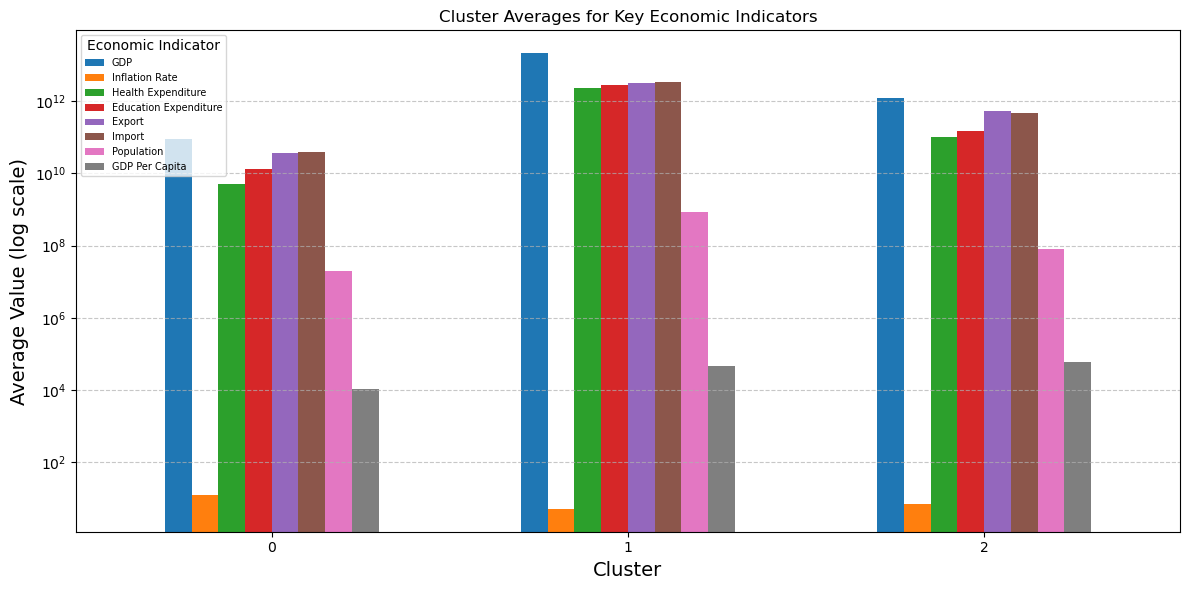

In [27]:
# Plotting
ax = cluster_summary_mean.plot(kind='bar', figsize=(12, 6), width=0.6)

# Set title and axis labels
plt.title('Cluster Averages for Key Economic Indicators', fontsize=12)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Average Value (log scale)', fontsize=14)

# Set x-axis tick labels
plt.xticks(rotation=0)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Customize legend
plt.legend(title='Economic Indicator', fontsize=7, title_fontsize=10, loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [28]:
# Define a dictionary for the countries
clustered_countries = df_recent.groupby('Cluster')['Country Name'].apply(list)
cluster_0_countries = clustered_countries[0]
cluster_1_countries = clustered_countries[1]
cluster_2_countries = clustered_countries[2]

cluster_dict = {country: 0 for country in cluster_0_countries}
cluster_dict.update({country: 1 for country in cluster_1_countries})
cluster_dict.update({country: 2 for country in cluster_2_countries})

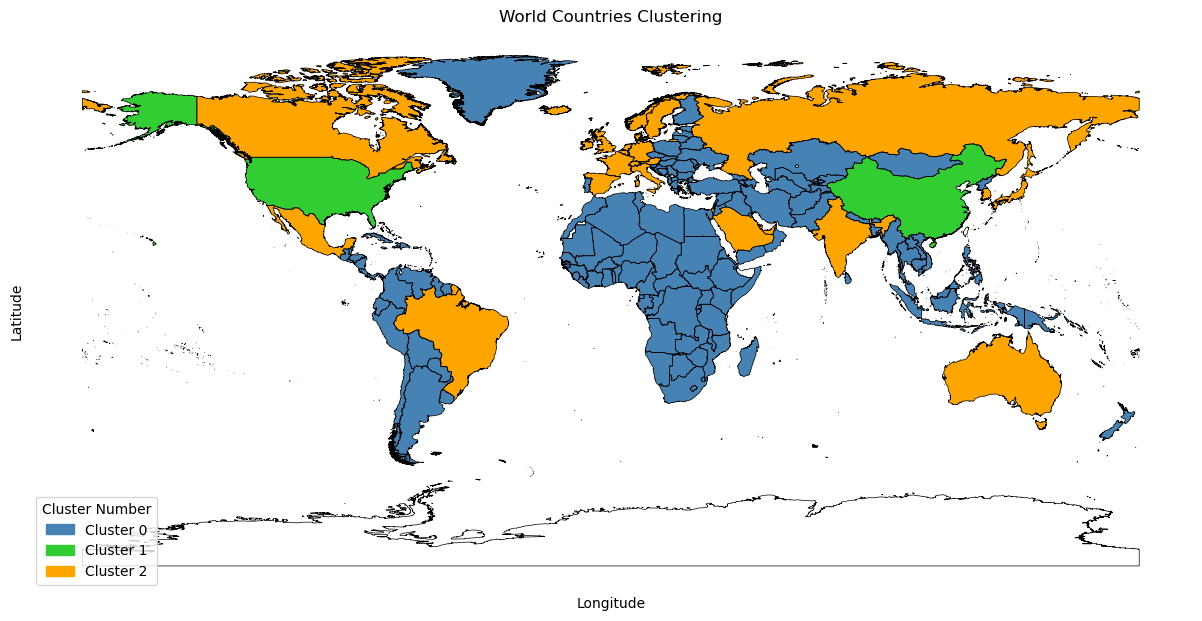

In [29]:
# Load the GeoJSON file into a GeoDataFrame
world_geojson = gpd.read_file('countries.geojson')

# Merge the GeoDataFrame with your data
merged = world_geojson.merge(df_recent, left_on='ISO_A3', right_on='Country Code', how='left')

# Define the color map to use
cmap = ListedColormap(['#4682B4', '#32CD32', '#FFA500'])

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot country boundaries with a thinner linewidth and lighter color
world_geojson.boundary.plot(ax=ax, linewidth=0.5, color='black')

# Plot countries colored by cluster
merged.plot(column='Cluster', ax=ax, cmap=cmap)

# Set title and axis labels
plt.title('World Countries Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove x and y axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Remove frame around the plot
ax.set_frame_on(False)

# Get handles and labels for legend
handles = [plt.Rectangle((0, 0), 1, 1, color=cmap(i)) for i in range(len(cmap.colors))]
labels = ['Cluster {}'.format(i) for i in range(len(cmap.colors))]

# Create legend explicitly
plt.legend(handles, labels, title='Cluster Number', loc='lower left')

plt.show()

## Cluster Analysis

### **Cluster 0: Emerging Economies**

- **GDP**: Mean: $92.99 billion, Median: $21.60 billion - Characterized by emerging market conditions with significant variability, reflecting diverse stages of economic development.
- **Inflation Rate**: Mean: 11.96%, Median: 7.91% - Indicates higher and more volatile inflation rates, typical of economies experiencing rapid changes or growth phases.
- **Health Expenditure**: Mean: $5.02 billion, Median: $2.10 billion - Modest health investments relative to the size of these economies.
- **Education Expenditure**: Mean: $13.38 billion, Median: $4.47 billion - Reflects investment in educational infrastructure that varies widely across these nations.
- **Export**: Mean: $37.58 billion - Shows substantial export activities, indicative of trade-engaged economies.
- **Import**: Mean: $39.37 billion - Slightly higher imports suggest trade deficits in many countries within this cluster.
- **Population**: Mean: 19.82 million, Median: 5.52 million - Generally includes countries with smaller to medium-sized populations.
- **GDP Per Capita**: Mean: $10,729, Median: $6,346 - Lower per capita incomes underline the emerging economic status with room for growth.

### **Cluster 1: Dominant Economies**

- **GDP**: Mean: $21.71 trillion - Represents the world's largest and most dominant economic powers with significant global influence.
- **Inflation Rate**: Mean: 4.99% - More stable inflation rates, characteristic of developed economies with effective economic policies.
- **Health Expenditure**: Mean: $2.39 trillion - High priority on health with significant investments reflecting enhanced public health standards.
- **Education Expenditure**: Mean: $2.91 trillion - High investment in education underpins well-established educational systems and human capital development.
- **Export**: Mean: $3.32 trillion - Strong global trade presence showcasing economic power.
- **Import**: Mean: $3.51 trillion - High import levels typical for large economies, indicating diverse and robust consumer markets.
- **Population**: Mean: 872.73 million - Includes very populous nations, providing vast domestic markets and extensive labor resources.
- **GDP Per Capita**: Mean: $44,559 - Indicates a high standard of living and substantial economic prosperity.

### **Cluster 2: Developed Economies**

- **GDP**: Mean: $1.25 trillion, Median: $696.82 billion - Well-developed economies with considerable industrial and technological bases.
- **Inflation Rate**: Mean: 6.63%, Median: 7.28% - Moderate inflation rates suggest balanced economic conditions and monetary policies.
- **Health Expenditure**: Mean: $99.72 billion - Significant health funding essential for maintaining advanced healthcare systems.
- **Education Expenditure**: Mean: $152.42 billion - Strong educational investments critical for sustained economic growth and innovation.
- **Export**: Mean: $526.23 billion - Highly competitive in global markets with robust export activities.
- **Import**: Mean: $481.18 billion - Strong imports reflect diverse economic inputs and substantial consumer markets.
- **Population**: Mean: 81.20 million, Median: 11.08 million - Generally large populations supporting significant economic activities.
- **GDP Per Capita**: Mean: $60,258, Median: $54,209 - Very high per capita GDP indicative of wealthy, high-standard-of-living countries.
